In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing  import  scale
from sklearn.decomposition  import PCA
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

In [2]:
csv0= pd.read_csv("0.csv")
csv1= pd.read_csv("1.csv")
csv2= pd.read_csv("2.csv")
csv3= pd.read_csv("3.csv")

In [3]:

allFiles=['0.csv', '1.csv', '2.csv', '3.csv']
list = []
for file in allFiles:
    read = pd.read_csv(file, header = None)
    list.append(read)
data = pd.concat(list)


In [ ]:
data.info

<bound method DataFrame.info of         0    1    2    3     4     5      6     7     8    9   ...    55  \
0     26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ... -28.0   
1    -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ... -25.0   
2    -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ... -83.0   
3      2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ... -38.0   
4      6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ...  38.0   
...    ...  ...  ...  ...   ...   ...    ...   ...   ...  ...  ...   ...   
2917  -3.0 -1.0 -1.0 -1.0 -28.0  20.0    5.0   0.0  -5.0  0.0  ...  -3.0   
2918 -13.0 -5.0 -4.0 -3.0  -4.0 -24.0  -10.0  -8.0  20.0  9.0  ...   6.0   
2919  -1.0 -3.0 -1.0  1.0  30.0  38.0   -1.0  36.0 -10.0  1.0  ...  14.0   
2920   1.0  4.0  4.0  5.0   9.0 -10.0    4.0   1.0  -2.0 -1.0  ... -16.0   
2921  -2.0  4.0  2.0 -4.0  12.0   3.0   -2.0   9.0  -8.0 -2.0  ...   2.0   

        56   57   58    59    60    61     62    63  64

In [ ]:
data.isnull().sum().head


<bound method NDFrame.head of 0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64>

In [ ]:
order= data[64].unique()
print(order)


[0 1 2 3]


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [5]:
y = data[64]
X = data.drop(columns=64)

In [ ]:
data[64].value_counts().sort_values(ascending=False)

2    2943
3    2922
0    2910
1    2903
Name: 64, dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer,normalize
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X =pd.DataFrame(X)

In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0


In [8]:
X_scaled = scale(X)
X_scaled =pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.428445,0.401724,1.150179,1.173139,-0.047110,-0.482211,-4.293826,-4.240470,-0.459858,0.224160,...,0.894454,-1.785637,3.396947,0.394898,1.764490,0.772653,0.232428,-0.259303,-2.278454,1.069524
1,-2.503492,-0.448155,-0.853937,-0.842622,0.737220,-0.017247,1.445765,-0.606050,0.588529,-0.282565,...,-4.087375,-1.587727,2.627872,0.561499,1.362038,0.772653,0.736892,0.836588,4.451912,1.005130
2,-0.995352,-0.618131,-1.455172,-0.977006,-1.167581,-0.210982,-3.098077,0.821758,0.036746,0.477522,...,-4.996756,-5.414002,0.430515,0.644800,0.355910,-0.987888,0.400583,0.836588,4.570683,3.130128
3,0.135753,0.316736,0.148121,0.366835,0.008913,0.873935,4.275702,-0.865651,-0.846106,-0.113656,...,-2.070920,-2.445340,-0.558296,0.394898,1.563264,1.585211,1.857924,1.541089,4.768635,2.808159
4,0.351202,0.061772,0.148121,-0.170702,-0.775416,0.408971,-1.982046,0.367456,0.422994,0.055252,...,2.436448,2.568400,-1.876710,-0.604712,0.557136,0.908079,-0.720448,-0.924666,-4.376745,-4.403956


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=40)

accuracy: 0.39027175154144783 

accuracy: 0.3421232876712329 



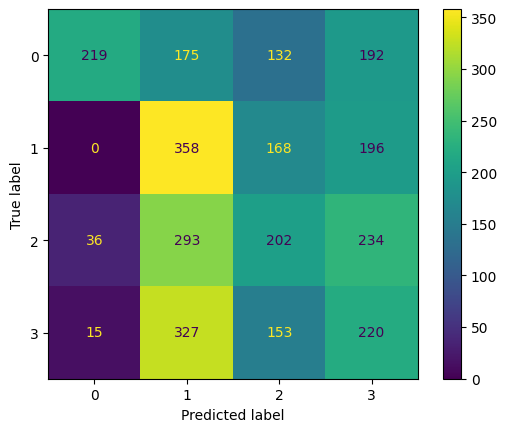

In [10]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_test = linear_svm.predict(X_test)
y_pred_train = linear_svm.predict(X_train)
print("accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

accuracy: 0.9513587577072391 

accuracy: 0.9044520547945205 



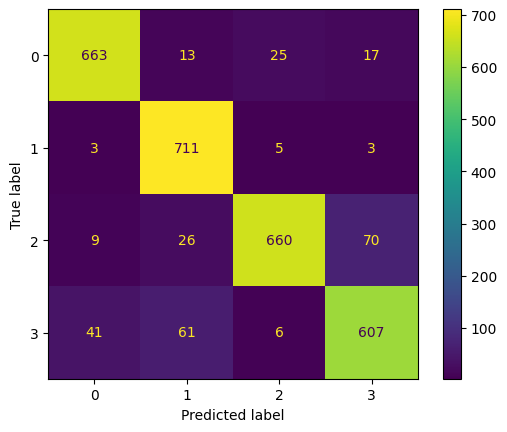

In [12]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_test = rbf_svm.predict(X_test)
y_pred_train = rbf_svm.predict(X_train)
print("accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
param_grid = [ {
    'C' :[4,6,10,20,25],
    "gamma" : ['scale',0.01,5],
    'kernel' :['rbf']},
                ]

model = SVC(kernel="rbf")

optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=10,
    n_jobs= -5,
    return_train_score=True
)
optimal_parameters.fit(X_train,y_train)

print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 3/5; 1/15] START C=4, gamma=scale, kernel=rbf...............................
[CV 2/5; 2/15] START C=4, gamma=0.01, kernel=rbf................................
[CV 1/5; 1/15] START C=4, gamma=scale, kernel=rbf...............................
[CV 2/5; 1/15] START C=4, gamma=scale, kernel=rbf...............................
[CV 5/5; 2/15] START C=4, gamma=0.01, kernel=rbf................................
[CV 4/5; 1/15] START C=4, gamma=scale, kernel=rbf...............................
[CV 2/5; 3/15] START C=4, gamma=5, kernel=rbf...................................
[CV 5/5; 1/15] START C=4, gamma=scale, kernel=rbf...............................
[CV 4/5; 2/15] START C=4, gamma=0.01, kernel=rbf................................
[CV 1/5; 2/15] START C=4, gamma=0.01, kernel=rbf................................
[CV 1/5; 3/15] START C=4, gamma=5, kernel=rbf...................................
[CV 3/5; 2/15] START C=4, gamma=0.01, kernel=rbf

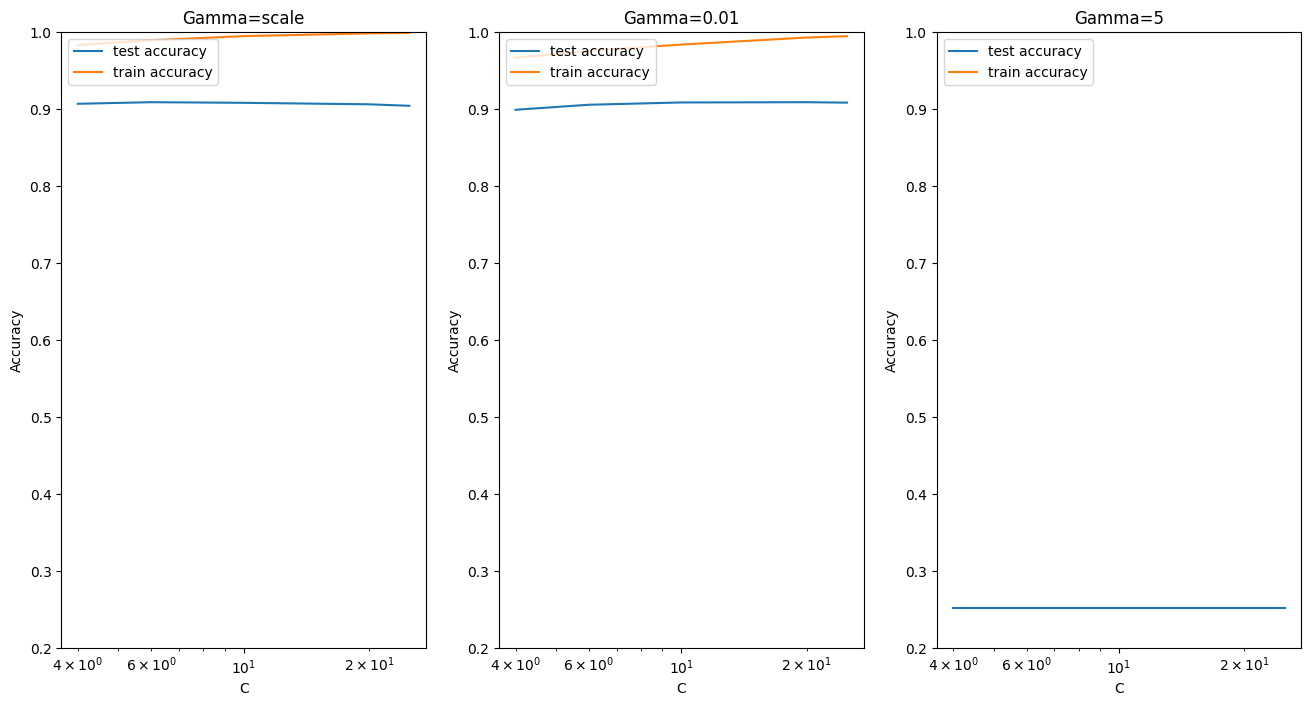

In [ ]:
cv_results = pd.DataFrame(optimal_parameters.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_scale = cv_results[cv_results['param_gamma']=='scale']

plt.plot(gamma_scale["param_C"], gamma_scale["mean_test_score"])
plt.plot(gamma_scale["param_C"], gamma_scale["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=scale")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_5 = cv_results[cv_results['param_gamma']==5]

plt.plot(gamma_5["param_C"], gamma_5["mean_test_score"])
plt.plot(gamma_5["param_C"], gamma_5["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=5")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [ ]:
param_grid = [ {
    'C' :[4,6,10,20,25],
    "gamma" : ['scale',0.01,0.1,0.0001],
    'kernel' :['rbf']},
                ]

model = SVC(C=6, gamma='scale',kernel="rbf")

optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=10,
    n_jobs= -5,
    return_train_score=True
)
optimal_parameters.fit(X_train,y_train)

print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=4, gamma=scale, kernel=rbf...............................
[CV 2/5; 1/20] START C=4, gamma=scale, kernel=rbf...............................
[CV 3/5; 1/20] START C=4, gamma=scale, kernel=rbf...............................
[CV 4/5; 1/20] START C=4, gamma=scale, kernel=rbf...............................
[CV 5/5; 1/20] START C=4, gamma=scale, kernel=rbf...............................
[CV 1/5; 2/20] START C=4, gamma=0.01, kernel=rbf................................
[CV 2/5; 2/20] START C=4, gamma=0.01, kernel=rbf................................
[CV 3/5; 2/20] START C=4, gamma=0.01, kernel=rbf................................
[CV 4/5; 2/20] START C=4, gamma=0.01, kernel=rbf................................
[CV 5/5; 2/20] START C=4, gamma=0.01, kernel=rbf................................
[CV 1/5; 3/20] START C=4, gamma=0.1, kernel=rbf.................................
[CV 2/5; 3/20] START C=4, gamma=0.1, kernel=rbf

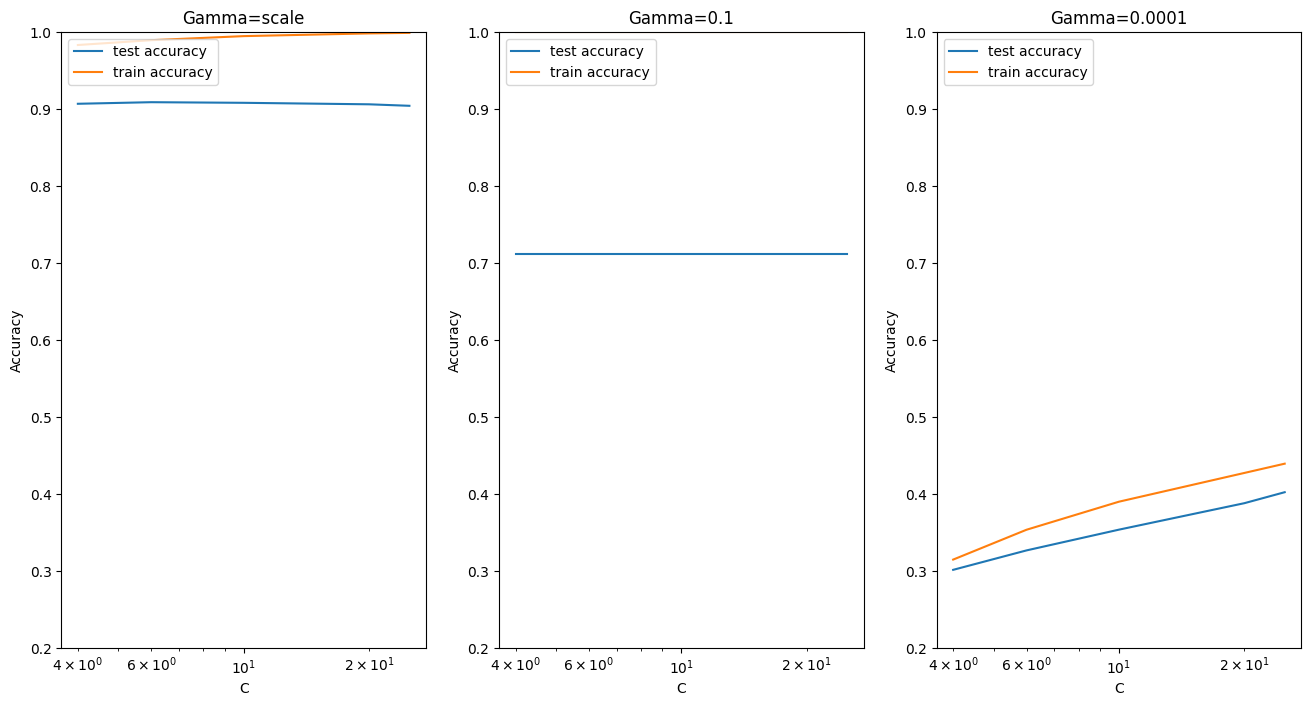

In [ ]:
cv_results = pd.DataFrame(optimal_parameters.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_scale = cv_results[cv_results['param_gamma']=='scale']

plt.plot(gamma_scale["param_C"], gamma_scale["mean_test_score"])
plt.plot(gamma_scale["param_C"], gamma_scale["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=scale")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_5 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_5["param_C"], gamma_5["mean_test_score"])
plt.plot(gamma_5["param_C"], gamma_5["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


Train accuracy:  0.7990408769125371 

Test accuracy: 0.663013698630137 



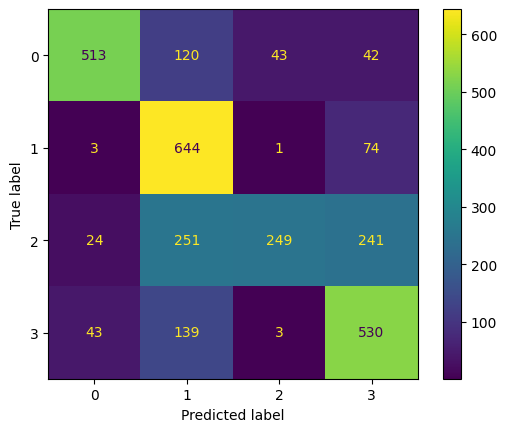

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_test = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [ ]:
model= KNeighborsClassifier()
param_grid = [{'n_neighbors': np.arange(1, 40)}]
optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=10,
    n_jobs= -1,
    return_train_score=True
)
optimal_parameters.fit(X_train,y_train)

print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV 1/5; 1/39] START n_neighbors=1..............................................
[CV 2/5; 1/39] START n_neighbors=1..............................................
[CV 3/5; 1/39] START n_neighbors=1..............................................
[CV 4/5; 1/39] START n_neighbors=1..............................................
[CV 5/5; 1/39] START n_neighbors=1..............................................
[CV 1/5; 2/39] START n_neighbors=2..............................................
[CV 2/5; 2/39] START n_neighbors=2..............................................
[CV 3/5; 2/39] START n_neighbors=2..............................................
[CV 4/5; 2/39] START n_neighbors=2..............................................
[CV 5/5; 2/39] START n_neighbors=2..............................................
[CV 1/5; 3/39] START n_neighbors=3..............................................
[CV 2/5; 3/39] START n_neighbors=3.............

Train accuracy:  0.33375199817309886 

Test accuracy: 0.2965753424657534 

Test Set Score : 29.65753424657534 %


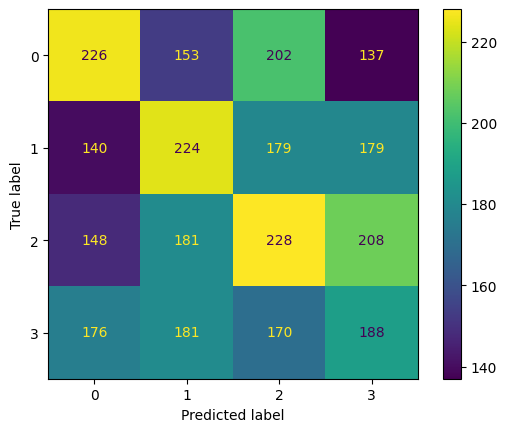

In [17]:
from sklearn.neighbors import NearestCentroid

ncc_model = NearestCentroid()
ncc_model.fit(X_train, y_train)
y_pred_test = ncc_model.predict(X_test)
y_pred_train = ncc_model.predict(X_train)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
print(f"Test Set Score : {ncc_model.score(X_test, y_test) * 100} %")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()